In [1]:
# %%
import matplotlib.pyplot as plt
import pandas as pd
import seaborn
import numpy as np
import os
directory_path = os.getcwd()
print("in directory: ",directory_path)
from matplotlib.pyplot import figure

in directory:  C:\Users\n368357\Downloads\average_values\average_values


In [2]:
# get data corresponding to a model type
def get_data(model_type,shift):
    data_type = ["Kin8","CCPP","Naval_Propulsion","California_Housing","WineWhite"]
    # file where the plot will be stored
    df = {}

    if shift:
        shift_name = "with"
    else:
        shift_name = "without"

    # read the results
    for data in data_type:
        base_file_name = "/error_table_" + data + "_"
        df[data] = pd.read_csv(directory_path + base_file_name + model_type + '_' + shift_name +  ".csv",sep = ",")
    
    # the results in MVE are still tagged as Res-Gauss. We rename them to MVE
    if model_type == "MVE_NN":
        [df[data].rename(columns = {"Res-Gauss":"MVE"},inplace = True) for data in data_type]
    
    [df[data].rename(columns = {"emp coverage":"Emp"},inplace = True) for data in data_type]
    
    if shift:
        [df[data].drop(["tolerance","n_effective"],axis = 1,inplace = True) for data in data_type]
    else:
        [df[data].drop(["tolerance"],axis =1,inplace = True) for data in data_type]
    

    return df

In [3]:
def get_best_algo(df,model_type,data_type,shift):
    output_filename = "best_algo_" + data_type + "_" + model_type + "_" + str(shift) + ".txt"  

    with open(output_filename,"w") as f:
            emp_covg = df[data_type]["Emp"].mean()
            # take the mean over different trials
            temp_df = df[data_type].copy(deep = True)
            temp_df.drop(columns = {"Emp"},inplace = True)
            temp_df = temp_df.mean()
            min_error = 1000
            # find the method with the minimum error
            for method in temp_df.keys(): 
                if (np.abs(temp_df[method] - emp_covg) < min_error):
                    min_error= np.abs(temp_df[method] - emp_covg)
                    best_method = method
               
            print('data:',data_type," ,best method",best_method," ,conservativeness: ", (temp_df[best_method]  < emp_covg),file = f)

    
"""
## Plotting routine ##
"""

# %%
def plot_errors(model_type,shift,data_type):

    df = get_data(model_type,shift)
    figure(figsize=(8, 6), dpi=80)
    get_best_algo(df,model_type,data_type,shift)
    
    if model_type == "NN" and (not shift):
        title_name = "results for NN-1, " + data_type + "(iid)"
        output_filename = data_type + "_without_shift_" + model_type + ".pdf"
    if model_type == "NN" and shift:
        title_name = "results for NN-1, " + data_type + "(with shift)"
        output_filename =  data_type + "_with_shift_" + model_type + ".pdf"
    if model_type == "MVE_NN" and (not shift):
        title_name = "results for NN-2, " + data_type + "(no shift)"
        output_filename =  data_type + "_without_shift_" + model_type  + ".pdf"
    if model_type == "MVE_NN" and shift:
        title_name = "results for NN-2, " + data_type + "(with shift)"
        output_filename = data_type + "_with_shift_" + model_type + ".pdf"

        
    miss_coverage = 1 - df[data_type]
    # calculate the accuracy of methods
    accuracy = miss_coverage.copy(deep=True).mean()
    miss_coverage.plot(kind="box")  
    print(accuracy["Emp"] - accuracy)
    plt.grid()
    plt.yticks(fontsize=15)
    plt.xticks(fontsize=15)
    plt.title(title_name)
    plt.ylabel('miss-coverages',fontsize = 15)
    plt.savefig(output_filename, bbox_inches='tight')


**Results for Kin8**

NN-1 without Kin8
CP-S         0.014989
CP-CV       -0.188357
Res-Gauss   -0.003160
Emp          0.000000
dtype: float64
--------------------------------------------------
NN-1 with Kin8
CP-SW       -0.001566
CP-CVW      -0.193510
CP-S         0.020470
Res-Gauss    0.014295
Emp          0.000000
dtype: float64
--------------------------------------------------
NN-2 without Kin8
CP-S     0.010994
CP-CV   -0.109607
MVE      0.042615
Emp      0.000000
dtype: float64
--------------------------------------------------
NN-2 with Kin8
CP-SW    -0.014588
CP-CVW   -0.153086
CP-S     -0.022967
MVE       0.008464
Emp       0.000000
dtype: float64


<Figure size 640x480 with 0 Axes>

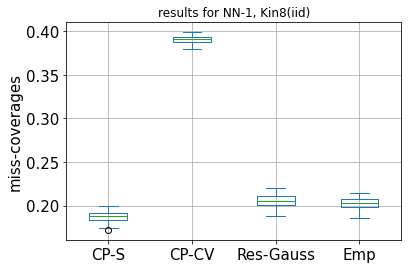

<Figure size 640x480 with 0 Axes>

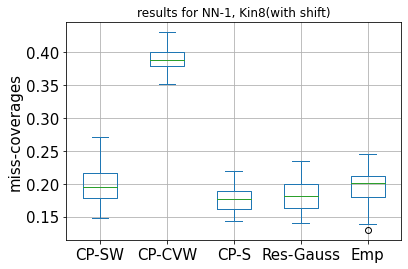

<Figure size 640x480 with 0 Axes>

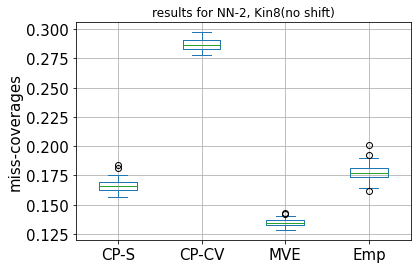

<Figure size 640x480 with 0 Axes>

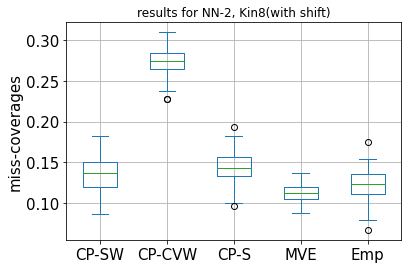

In [4]:
# %%
"""
## Results ##
"""
# %%
print("NN-1 " + "without" +" Kin8")
plot_errors(model_type = "NN",shift = False,data_type = "Kin8")
print('-'*50)
print("NN-1 " + "with" +" Kin8")
plot_errors(model_type = "NN",shift = True,data_type = "Kin8")
print('-'*50)
print("NN-2 " + "without" +" Kin8")
plot_errors(model_type = "MVE_NN",shift = False,data_type = "Kin8")
print('-'*50)
print("NN-2 " + "with" +" Kin8")
plot_errors(model_type = "MVE_NN",shift = True,data_type = "Kin8")

**Results for CCPP**

NN-1 without CCPP
CP-S         0.000900
CP-CV       -0.169057
Res-Gauss   -0.079789
Emp          0.000000
dtype: float64
--------------------------------------------------
NN-1 with CCPP
CP-SW       -0.016875
CP-CVW      -0.241060
CP-S        -0.050511
Res-Gauss   -0.118564
Emp          0.000000
dtype: float64
--------------------------------------------------
NN-2 without CCPP
CP-S     0.003210
CP-CV   -0.155533
MVE     -0.065667
Emp      0.000000
dtype: float64
--------------------------------------------------
NN-2 with CCPP
CP-SW    -0.010766
CP-CVW   -0.191308
CP-S     -0.050629
MVE      -0.169941
Emp       0.000000
dtype: float64


<Figure size 640x480 with 0 Axes>

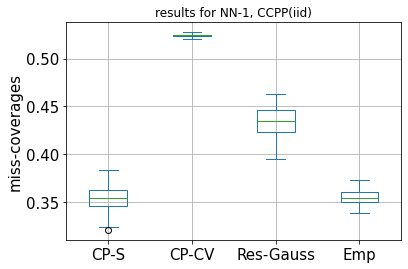

<Figure size 640x480 with 0 Axes>

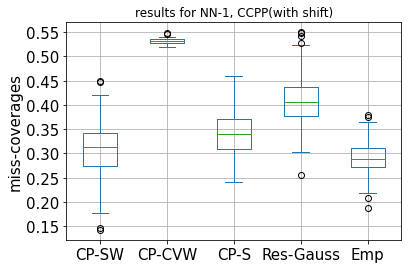

<Figure size 640x480 with 0 Axes>

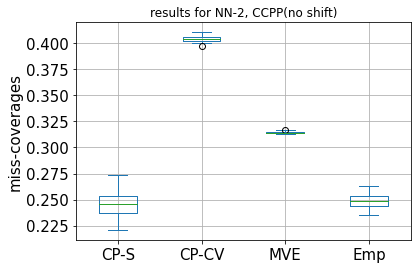

<Figure size 640x480 with 0 Axes>

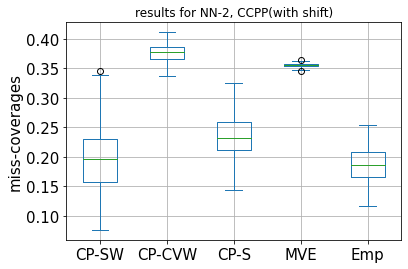

In [5]:

print("NN-1 " + "without" +" CCPP")
plot_errors(model_type = "NN",shift = False,data_type = "CCPP")
print('-'*50)
print("NN-1 " + "with" +" CCPP")
plot_errors(model_type = "NN",shift = True,data_type = "CCPP")
print('-'*50)
print("NN-2 " + "without" +" CCPP")
plot_errors(model_type = "MVE_NN",shift = False,data_type = "CCPP")
print('-'*50)
print("NN-2 " + "with" +" CCPP")
plot_errors(model_type = "MVE_NN",shift = True,data_type = "CCPP")

**Naval Propulsion**

NN-1 without NP
CP-S        -0.001142
CP-CV       -0.530994
Res-Gauss   -0.098157
Emp          0.000000
dtype: float64
--------------------------------------------------
NN-1 with NP
CP-SW       -0.014447
CP-CVW      -0.501749
CP-S         0.029464
Res-Gauss   -0.066342
Emp          0.000000
dtype: float64
--------------------------------------------------
NN-2 without NP
CP-S    -0.001568
CP-CV   -0.104311
MVE     -0.156496
Emp      0.000000
dtype: float64
--------------------------------------------------
NN-2 with NP
CP-SW    -0.006135
CP-CVW   -0.123312
CP-S      0.325100
MVE       0.052330
Emp       0.000000
dtype: float64


<Figure size 640x480 with 0 Axes>

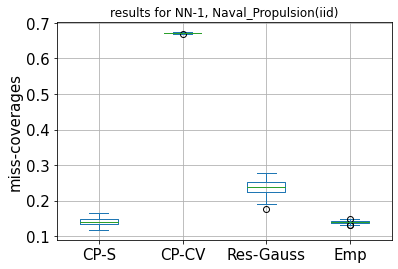

<Figure size 640x480 with 0 Axes>

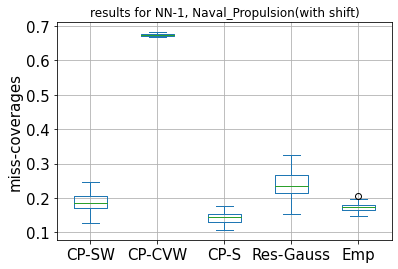

<Figure size 640x480 with 0 Axes>

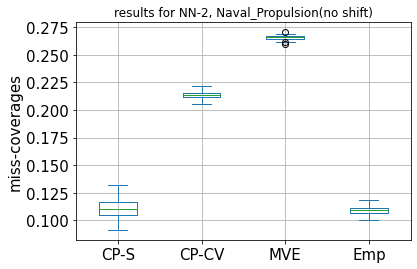

<Figure size 640x480 with 0 Axes>

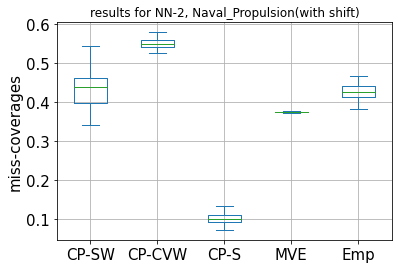

In [6]:

print("NN-1 " + "without" +" NP")
plot_errors(model_type = "NN",shift = False,data_type = "Naval_Propulsion")
print('-'*50)
print("NN-1 " + "with" +" NP")
plot_errors(model_type = "NN",shift = True,data_type = "Naval_Propulsion")
print('-'*50)
print("NN-2 " + "without" +" NP")
plot_errors(model_type = "MVE_NN",shift = False,data_type = "Naval_Propulsion")
print('-'*50)
print("NN-2 " + "with" +" NP")
plot_errors(model_type = "MVE_NN",shift = True,data_type = "Naval_Propulsion")

**California Housing**

NN-1 without CH
CP-S        -0.021727
CP-CV       -0.204189
Res-Gauss   -0.186027
Emp          0.000000
dtype: float64
--------------------------------------------------
NN-1 with CH
CP-SW       -0.017053
CP-CVW      -0.212078
CP-S        -0.099088
Res-Gauss   -0.276251
Emp          0.000000
dtype: float64
--------------------------------------------------
NN-2 without CH
CP-S     0.007889
CP-CV   -0.203126
MVE     -0.054601
Emp      0.000000
dtype: float64
--------------------------------------------------
NN-2 with CH
CP-SW     0.012128
CP-CVW   -0.226344
CP-S     -0.092127
MVE      -0.054922
Emp       0.000000
dtype: float64


<Figure size 640x480 with 0 Axes>

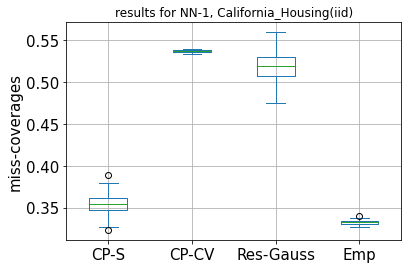

<Figure size 640x480 with 0 Axes>

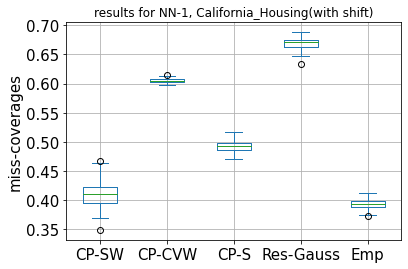

<Figure size 640x480 with 0 Axes>

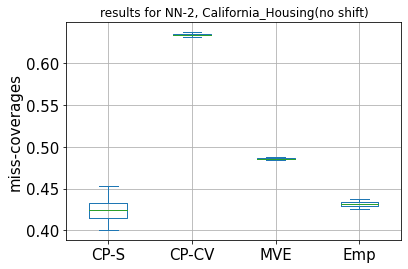

<Figure size 640x480 with 0 Axes>

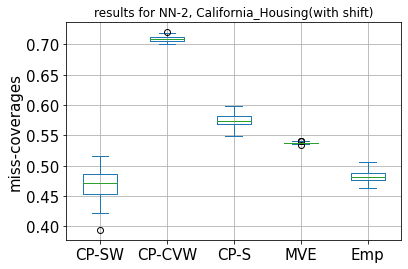

In [7]:

print("NN-1 " + "without" +" CH")
plot_errors(model_type = "NN",shift = False,data_type = "California_Housing")
print('-'*50)
print("NN-1 " + "with" +" CH")
plot_errors(model_type = "NN",shift = True,data_type = "California_Housing")
print('-'*50)
print("NN-2 " + "without" +" CH")
plot_errors(model_type = "MVE_NN",shift = False,data_type = "California_Housing")
print('-'*50)
print("NN-2 " + "with" +" CH")
plot_errors(model_type = "MVE_NN",shift = True,data_type = "California_Housing")

**Wine White**

NN-1 without WW
CP-S        -0.010444
CP-CV       -0.269885
Res-Gauss   -0.027708
Emp          0.000000
dtype: float64
--------------------------------------------------
NN-1 with WW
CP-SW       -0.040484
CP-CVW      -0.327281
CP-S        -0.044983
Res-Gauss   -0.040581
Emp          0.000000
dtype: float64
--------------------------------------------------
NN-2 without WW
CP-S    -0.000858
CP-CV   -0.058062
MVE      0.009630
Emp      0.000000
dtype: float64
--------------------------------------------------
NN-2 with WW
CP-SW    -0.019139
CP-CVW   -0.040264
CP-S      0.055049
MVE       0.032438
Emp       0.000000
dtype: float64


<Figure size 640x480 with 0 Axes>

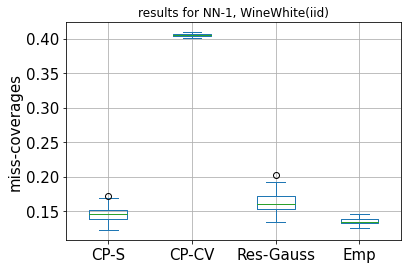

<Figure size 640x480 with 0 Axes>

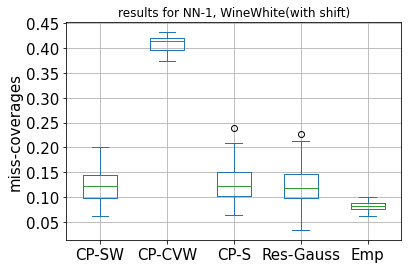

<Figure size 640x480 with 0 Axes>

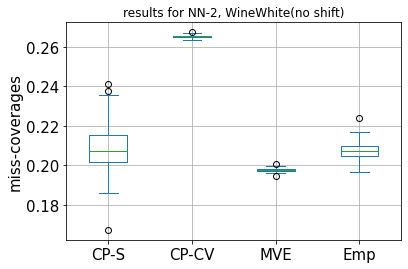

<Figure size 640x480 with 0 Axes>

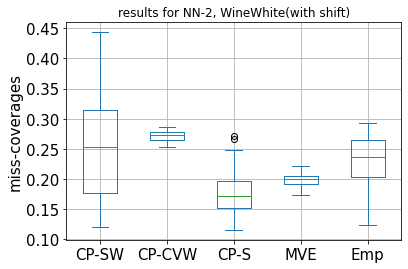

In [8]:

print("NN-1 " + "without" +" WW")
plot_errors(model_type = "NN",shift = False,data_type = "WineWhite")
print('-'*50)
print("NN-1 " + "with" +" WW")
plot_errors(model_type = "NN",shift = True,data_type = "WineWhite")
print('-'*50)
print("NN-2 " + "without" +" WW")
plot_errors(model_type = "MVE_NN",shift = False,data_type = "WineWhite")
print('-'*50)
print("NN-2 " + "with" +" WW")
plot_errors(model_type = "MVE_NN",shift = True,data_type = "WineWhite")